# Assignment 1: Naive Bayes classification {-}

This assignment aims at familiarizing you with training and testing Naive Bayes model. The dataset you will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance. You will have to do:
1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the travel-insurance.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data.  
    1.2 *(1 point)* Preprocess the data for modeling; divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    1.3 *(1 point)* Train a Gaussian Naive Bayes (GaussianNB, https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique (see GridSearchCV).  
    1.4 *(1 point)* Train a Mixed Naive Bayes (MixedNB, https://pypi.org/project/mixed-naive-bayes/) model.  
    1.5 *(1 point)* Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Which features in the dataset do you think have the most impact on predicting whether a customer buys travel insurance? Why?  
    2.2 *(1 point)* The Naive Bayes classifier assumes feature independence. Do you think this assumption holds for this dataset? Justify your answer.  
    2.3 *(1 point)* Did you observe any surprising patterns or trends in the dataset while exploring the data? Provide examples and possible explanations.  
    2.4 *(1 point)* How did tuning the var_smoothing parameter affect the performance of GaussianNB? What strategy did you use to find the best value?  
    2.5 *(1 point)* Do you think this dataset is sufficient for accurately predicting travel insurance purchases? What additional data points would you collect to improve prediction accuracy?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment1 (e.g., ML4DS-2012345-Assigment1) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training and testing purpose, build a Naive Bayes classifier and evaluate the model performance. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv("travel-insurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

## 1. Coding tasks

### 1.1 Data Cleaning

In [173]:
df.info()
# Observe that there is a redundant colum "Unnamed: 0", so we aim to drop it
df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 


In [174]:
# Checking missing values
df.isnull()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1982,False,False,False,False,False,False,False,False,False
1983,False,False,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False


In [175]:
# Basic Data Analysis
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


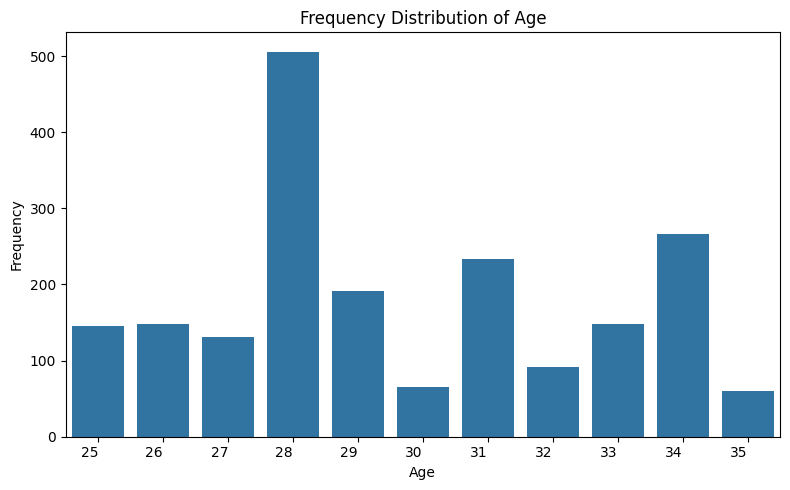

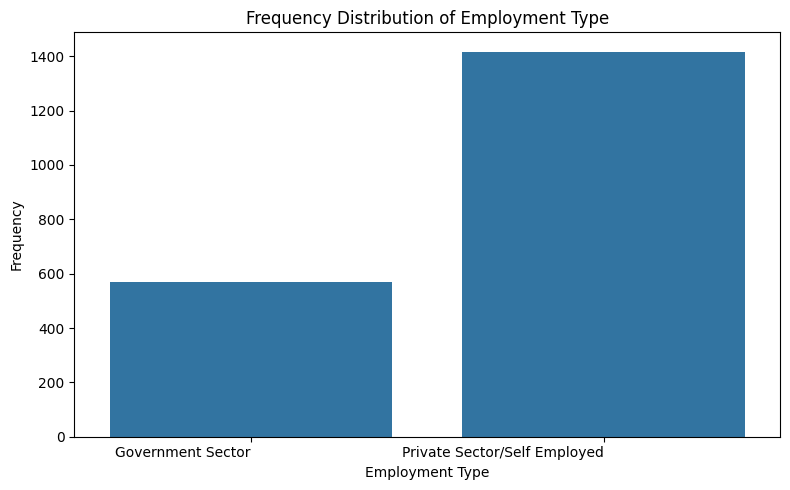

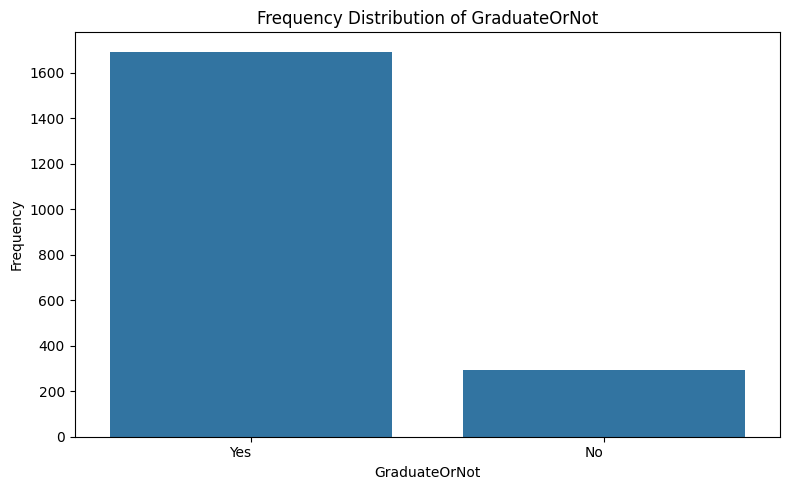

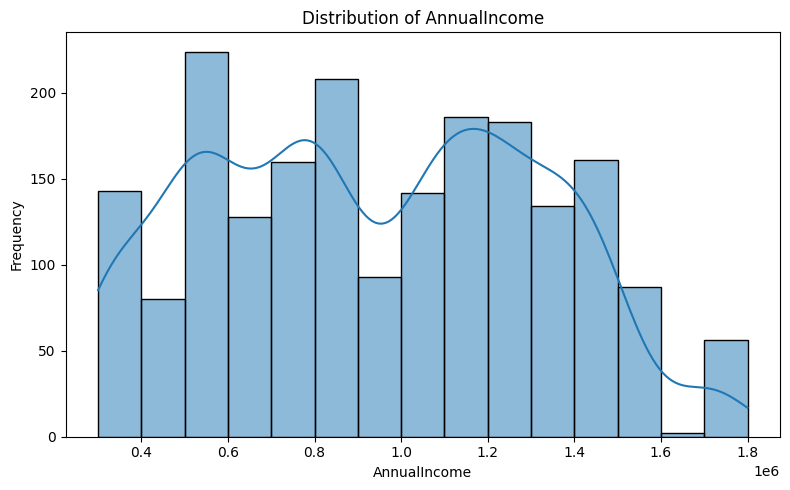

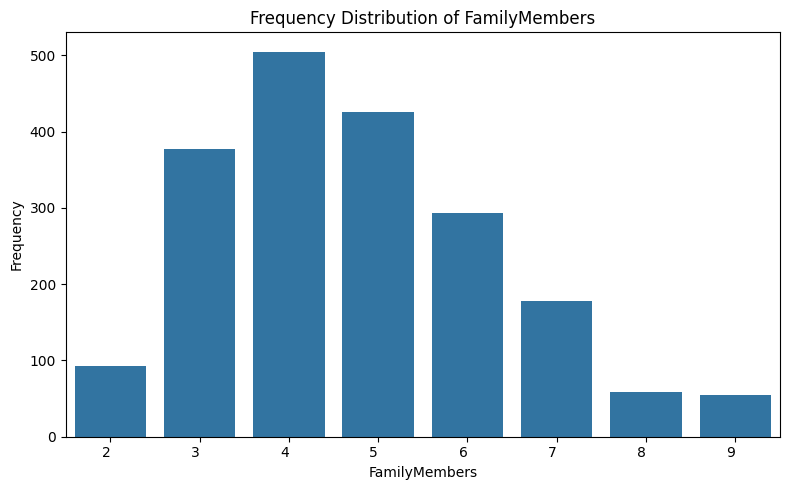

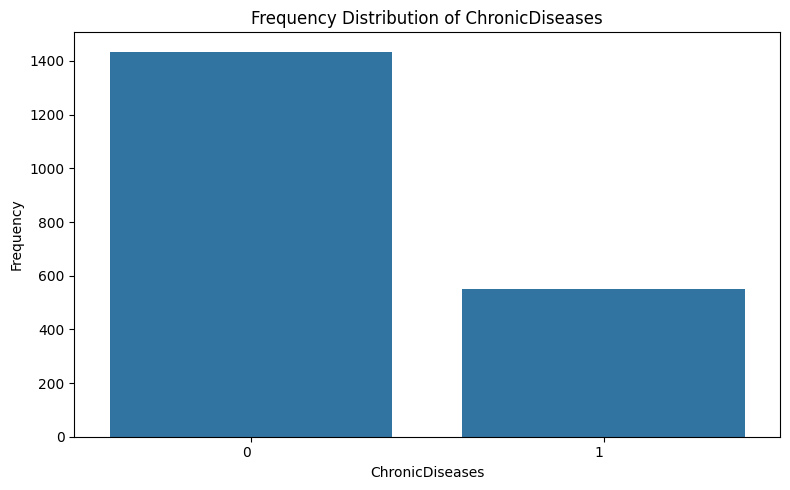

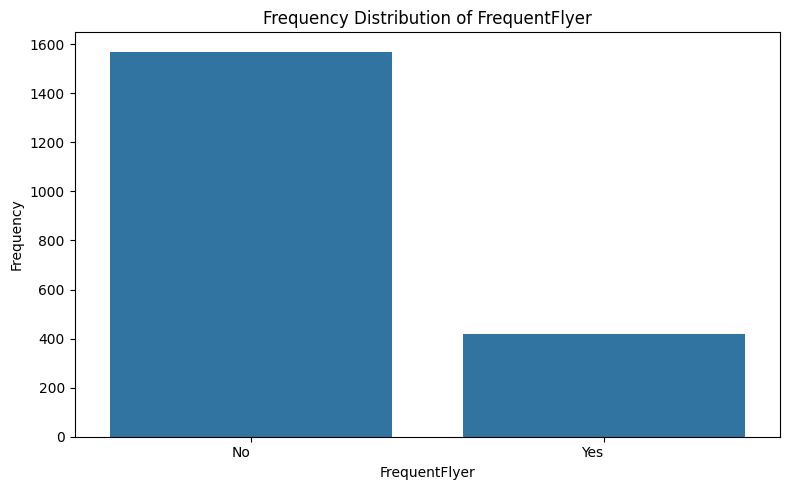

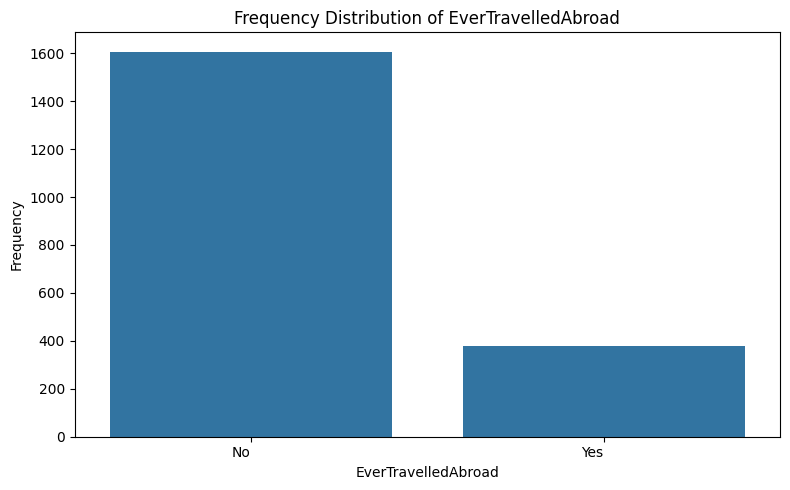

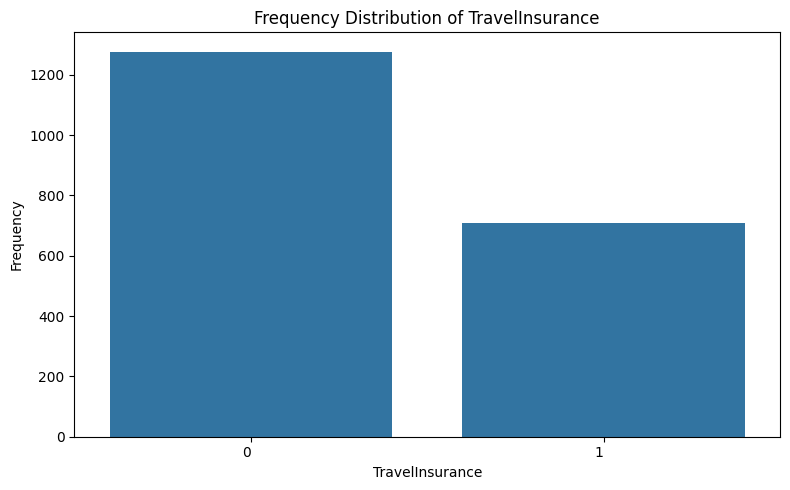

In [176]:
# Data Visualzation using bar chart for each feature columns

feature_names = df.columns.tolist()

for feature in feature_names:
    plt.figure(figsize=(8, 5))
    if feature == 'AnnualIncome':
        sns.histplot(data=df, x=feature, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    else:
        sns.countplot(data=df, x=feature)
        plt.title(f'Frequency Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation=0, ha='right')

    plt.tight_layout()
    plt.show()

#### Comments and Insights

- From the above simple data visualization based on feature frequencies, I have some insights as:

  1. Most of the customers are 35 years old or younger. Although **age is not a primary indicator for travel insurance**, the dataset is **biased toward younger customers** and therefore does **not provide a comprehensive overview of customers across varied age groups**.
  2. At first, I will think of EverTravelledAbroad, ChronicDiseases and FrequentFlyer are some candidate for potential deterministic features and indicator for TravelInsurance's label. However, below are some of my arguments given the above visualization:
  
     - Our initial assumption was that a higher proportion of “Yes” responses could cause the model to lean heavily toward this feature, potentially leading to unbalanced predictions. However, in this dataset,** the proportion of customers who responded “Yes” to FrequentFlyer is less than 20%**, which (from my perspective < 50%) is not biased at all!

     - In conclusion, although we may **initially expect certain features to show strong correlations** with the target label, this dataset serves as a counterexample, highlighting how outcomes can be uncertain and differ from initial assumptions. A similar pattern is observed for ChronicDiseases and EverTravelledAbroad, suggesting that these features individually may have limited predictive power in this dataset.


### 1.2 Data Preprocessing

In [177]:
# Preprocessing data for modelling
df_copy = df.copy()
df_copy

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [178]:
# Processing one-hot encoding of string categories data features
data = pd.get_dummies(data=df_copy, columns=["Employment Type","GraduateOrNot","FrequentFlyer","EverTravelledAbroad"],dtype=int)
data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,1,0,1,0,1,0,1,0,1


In [179]:
# Extract features
feature_names = data.columns.tolist()
feature_names.remove("TravelInsurance")
X = data[feature_names].values
Y = data.TravelInsurance.values

In [180]:
# Optional: Just seeing head info of the main data set to verify the code is right or not missing anything
check = pd.DataFrame(X)
print(check.head())
print(check.shape)
print(check.info())

   0        1   2   3   4   5   6   7   8   9   10  11
0  31   400000   6   1   1   0   0   1   1   0   1   0
1  31  1250000   7   0   0   1   0   1   1   0   1   0
2  34   500000   4   1   0   1   0   1   1   0   1   0
3  28   700000   3   1   0   1   0   1   1   0   1   0
4  28   700000   8   1   0   1   0   1   0   1   1   0
(1987, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1987 non-null   int64
 1   1       1987 non-null   int64
 2   2       1987 non-null   int64
 3   3       1987 non-null   int64
 4   4       1987 non-null   int64
 5   5       1987 non-null   int64
 6   6       1987 non-null   int64
 7   7       1987 non-null   int64
 8   8       1987 non-null   int64
 9   9       1987 non-null   int64
 10  10      1987 non-null   int64
 11  11      1987 non-null   int64
dtypes: int64(12)
memory usage: 186.4 KB
None


In [181]:
from sklearn.model_selection import train_test_split
# Divide data set into train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# Divide the train set into new train set and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [182]:
# Standardize the data set into continuous type - using these for training/validating/testing GuassianNB
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_val = normalizer.transform(X_val)
X_normal_test = normalizer.transform(X_test)

In [183]:
# Import Gaussian Naive Bayes libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### 1.3 Training Gaussian Naive Bayes Model

#### Determine Sub-optimal Interval for var_smoothing tuning

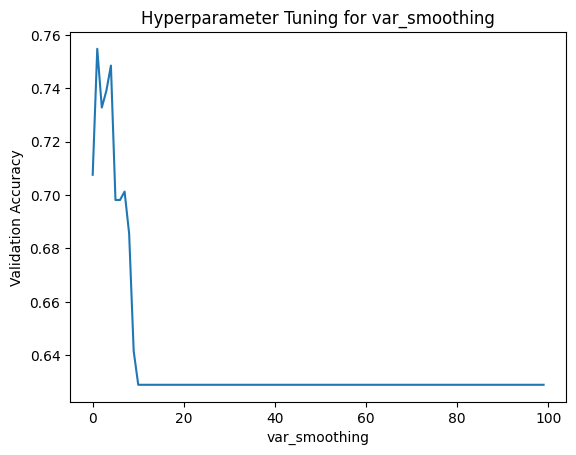

In [184]:
# Define an array from 0 to 100 with step size 1
candidate_values = np.arange(0, 100, 1)
# Storing accuracy
accs = []
for vs in candidate_values:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_normal_train, Y_train)
    acc = model.score(X_normal_val, Y_val)
    accs.append(acc)

plt.plot(candidate_values, accs)
plt.xlabel("var_smoothing")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning for var_smoothing")
plt.show()

#### Comments & Insights
- From the above graph, we can observe that the potential interval for the hyperparameter lies between 0 and 5. In the next step, we will refine this interval further to identify the most accurate range.

In [185]:
# Define an array with 200 values lies between (0.001, 5)
candidate_values = np.linspace(0.001, 5, 200)   # Used this arrays for both approach and also for MixedNB

#### Usual Validation Set Approach


In [186]:
results = []

for vs in candidate_values:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_normal_train, Y_train)
    acc = model.score(X_normal_val, Y_val)
    results.append((vs, acc))

# Convert results to a structured numpy array for analysis
results = np.array(results, dtype=[("var_smoothing", float), ("val_acc", float)])

# Find best parameter
best_idx = np.argmax(results["val_acc"])
best_param, best_acc = results[best_idx]
print(f"Best var_smoothing: {best_param:.4f}, Best Validation Accuracy: {best_acc:.4f}")


Best var_smoothing: 1.0309, Best Validation Accuracy: 0.7579


In [187]:
# Initialize GaussianNB with the best var_smoothing
gaussian_naive_bayes = GaussianNB(var_smoothing=best_param)

# Train the model
gaussian_naive_bayes.fit(X_normal_train, Y_train)

# Predict on the test set
Y_pred = gaussian_naive_bayes.predict(X_normal_test)

# Evaluate accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)

print("Best var_smoothing:", best_param)
print("Test Accuracy:", f"{test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred, digits=5))

Best var_smoothing: 1.0309447236180904
Test Accuracy: 0.7889

Classification Report:
               precision    recall  f1-score   support

           0    0.77170   0.94862   0.85106       253
           1    0.85057   0.51034   0.63793       145

    accuracy                        0.78894       398
   macro avg    0.81114   0.72948   0.74450       398
weighted avg    0.80044   0.78894   0.77341       398



#### Cross-validation Technique

In [188]:
from sklearn.model_selection import GridSearchCV
from numpy import vstack, concatenate

param_grid = {"var_smoothing": candidate_values}

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Set up Grid Search with cross-validation
gnb_cv = GridSearchCV(gnb, param_grid, cv=8)


# Combine train + validation for CV
X_normal_train_val, Y_train_val = vstack((X_normal_train, X_normal_val)), concatenate((Y_train, Y_val))

# Run grid search
gnb_cv.fit(X_normal_train, Y_train)

# Best parameters and score
print("Best var_smoothing:", gnb_cv.best_params_["var_smoothing"])
print("Best CV Accuracy:", f"{gnb_cv.best_score_:.10f}")


Best var_smoothing: 1.6589597989949747
Best CV Accuracy: 0.7718334528


In [189]:
# Best hyperparameter from GridSearchCV
best_vs = gnb_cv.best_params_['var_smoothing']

# Retrain on full training + validation set
gnb_best = GaussianNB(var_smoothing=best_vs)
gnb_best.fit(X_normal_train, Y_train)

# Predict on the test set
Y_pred_test = gnb_best.predict(X_normal_test)

# Evaluate performance
test_acc = accuracy_score(Y_test, Y_pred_test)
print("Best var_smoothing:", best_vs)
print("Test Accuracy:", f"{test_acc:.10f}")
# print("\nClassification Report:\n", classification_report(Y_test, Y_pred_test))


Best var_smoothing: 1.6589597989949747
Test Accuracy: 0.7788944724


### 1.4 Traing Mixed Bayes Model

In [190]:
# Prepare data set for training MixedNB model
mixed_nb_data_set = data.copy()
mixed_nb_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Age                                           1987 non-null   int64
 1   AnnualIncome                                  1987 non-null   int64
 2   FamilyMembers                                 1987 non-null   int64
 3   ChronicDiseases                               1987 non-null   int64
 4   TravelInsurance                               1987 non-null   int64
 5   Employment Type_Government Sector             1987 non-null   int64
 6   Employment Type_Private Sector/Self Employed  1987 non-null   int64
 7   GraduateOrNot_No                              1987 non-null   int64
 8   GraduateOrNot_Yes                             1987 non-null   int64
 9   FrequentFlyer_No                              1987 non-null   int64
 10  FrequentFlye

In [191]:
pip install mixed-naive-bayes

In [192]:
mixed_data = data.copy()
mixed_data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,1,0,1,0,1,0,1,0,1


In [193]:
# Extract features
X_mixed = mixed_data.drop(columns=["TravelInsurance"])
Y_mixed = mixed_data["TravelInsurance"]

# Double-check shape consistency
print("Shape of X:", X_mixed.shape)
print("Shape of Y:", Y_mixed.shape)

Shape of X: (1987, 12)
Shape of Y: (1987,)


In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define continuous/discrete data's column
continuous_cols = ["Age", "AnnualIncome", "FamilyMembers"]
categorical_cols = [col for col in X_mixed.columns if col not in continuous_cols]

# Split data
X_train_mixed, X_test_mixed, Y_train_mixed, Y_test_mixed = train_test_split(X_mixed, Y_mixed, test_size=0.2, random_state=1)
X_train_mixed, X_val_mixed, Y_train_mixed, Y_val_mixed = train_test_split(X_train_mixed, Y_train_mixed, test_size=0.2, random_state=1)

# Build transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cont", StandardScaler(), continuous_cols),
        ("cat", "passthrough", categorical_cols),
    ]
)

# Fit on train, transform train/test
X_dis_con_train = preprocessor.fit_transform(X_train_mixed)
X_dis_con_val = preprocessor.transform(X_val_mixed)
X_dis_con_test = preprocessor.transform(X_test_mixed)

In [197]:
from sklearn.model_selection import KFold
from mixed_naive_bayes import MixedNB
import numpy as np

# Combine train + val for cross-validation
X_train_val_mixed = np.vstack((X_dis_con_train, X_dis_con_val))
Y_train_val_mixed = np.concatenate((Y_train_mixed, Y_val_mixed))

# Figure out categorical indices AFTER transformation
# continuous first, categorical after → their indices are simply:
cont_dim = len(continuous_cols)
cat_indices = list(range(cont_dim, cont_dim + len(categorical_cols)))
# print(cat_indices) : [3, 4, 5, 6, 7, 8, 9, 10, 11]

kf = KFold(n_splits=8, shuffle=True, random_state=1)

best_acc = 0
best_param = None

for vs in candidate_values:
    fold_acc = []
    for train_idx, val_idx in kf.split(X_train_val_mixed):
        model = MixedNB(categorical_features=cat_indices, var_smoothing=vs)
        model.fit(X_train_val_mixed[train_idx], Y_train_val_mixed[train_idx])
        y_val_pred = model.predict(X_train_val_mixed[val_idx])
        fold_acc.append(accuracy_score(Y_train_val_mixed[val_idx], y_val_pred))
    mean_acc = np.mean(fold_acc)

    if mean_acc > best_acc:
        best_acc = mean_acc
        best_param = vs

print("Best var_smoothing:", best_param)
print("Best CV Accuracy:", best_acc)

Best var_smoothing: 0.05149494949494949
Best CV Accuracy: 0.7394421602964316


### 1.5 Evaluate and compare GaussianNB and MixedNB

In [196]:
# --- GaussianNB retrain with best hyperparameter ---
gnb_best = GaussianNB(var_smoothing=best_vs)
gnb_best.fit(X_normal_train_val, Y_train_val)
y_gnb_test = gnb_best.predict(X_normal_test)

print("GaussianNB Classification Report")
print(classification_report(Y_test, y_gnb_test, digits=5))
print("GaussianNB Test Accuracy:", accuracy_score(Y_test, y_gnb_test))

# --- MixedNB retrain with best hyperparameter ---
mixed_best = MixedNB(categorical_features=cat_indices, var_smoothing=best_param)
mixed_best.fit(X_dis_con_train, Y_train_mixed)
Y_mixed_pred = mixed_best.predict(X_dis_con_test)

print("\nMixedNB Classification Report")
print(classification_report(Y_test_mixed, Y_mixed_pred, digits=5))
print("MixedNB Test Accuracy:", accuracy_score(Y_test_mixed, Y_mixed_pred))


GaussianNB Classification Report
              precision    recall  f1-score   support

           0    0.76025   0.95257   0.84561       253
           1    0.85185   0.47586   0.61062       145

    accuracy                        0.77889       398
   macro avg    0.80605   0.71422   0.72812       398
weighted avg    0.79362   0.77889   0.76000       398

GaussianNB Test Accuracy: 0.7788944723618091

MixedNB Classification Report
              precision    recall  f1-score   support

           0    0.77211   0.89723   0.82998       253
           1    0.75000   0.53793   0.62651       145

    accuracy                        0.76633       398
   macro avg    0.76105   0.71758   0.72824       398
weighted avg    0.76405   0.76633   0.75585       398

MixedNB Test Accuracy: 0.7663316582914573


#### Comments & Insights


I evaluated the MixedNB model using the same dataset, converting columns such as Age, AnnualIncome, and FamilyMembers into continuous variables (by standardization), while treating the remaining columns as categorical features.

The goal of this approach was to test the hypothesis that MixedNB would outperform GaussianNB, since it is specifically designed to handle both categorical and continuous features. However, based on the classification reports, several similarity insights can be noted:

* The macro average of the f1-score for both models is nearly identical (≈ 0.
728), which indicates that when treating classes equally, both deliver almost the same overall balance.

* The accuracy, contrary to the expectation that MixedNB would outperform GaussianNB, turns out to be nearly equal between the two (0.778 ≈ 0.766).

* Both models ***perform well in classifying label [0]***.
* Both models show weak performance in classifying label [1], as reflected in their relatively low f1-scores (≈0.61 – 0.63). This indicates difficulty in balancing precision and recall for the minority class, which likely stems from class imbalance in the dataset.

In terms of differences, the following can be observed:

* While GaussianNB performs strongly in classifying label [0], its recall for label [1] is quite low (< 0.5), indicating that it **misses many positive predictions compared to the ground truth**. In the same scenario, MixedNB also does not perform particularly well, but it achieves a higher recall than GaussianNB, meaning it captures more correct predictions for label [1] (slightly better but not too outstanding).

Overall, both models perform reasonably well, and to some extent, their performance is not significantly different.

## 2. Open discussion questions

### 2.1 Which features in the dataset do you think have the most impact on predicting whether a customer buys travel insurance? Why?


To answer this question objectively, I intend to perform the chi2 - (Chi-Square) to test for the dependency of features to our label which is TravelInsurance.

In [199]:
from sklearn.feature_selection import chi2
chi2_vals, p_vals = chi2(X_train, Y_train)
pd.DataFrame({'feature': preprocessor.get_feature_names_out(),
              'chi2': chi2_vals, 'p_value': p_vals}).sort_values(by="chi2", ascending=False)


,feature,chi2,p_value
1,cont__AnnualIncome,2.903218e+07,0.000000e+00
11,cat__EverTravelledAbroad_Yes,1.844772e+02,5.104199e-42
9,cat__FrequentFlyer_Yes,5.636214e+01,6.028007e-14
10,cat__EverTravelledAbroad_No,4.338531e+01,4.495500e-11
4,cat__Employment Type_Government Sector,2.272853e+01,1.865771e-06
8,cat__FrequentFlyer_No,1.585185e+01,6.849951e-05
5,cat__Employment Type_Private Sector/Self Employed,9.051406e+00,2.624929e-03
2,cont__FamilyMembers,4.618384e+00,3.163103e-02
0,cont__Age,1.048472e+00,3.058594e-01
6,cat__GraduateOrNot_No,6.913240e-01,4.057144e-01


At first, **I assumed that FrequentFlyer, EverTravelledAbroad, and ChronicDiseases would be the primary indicators for predicting a customer’s likelihood of purchasing travel insurance**, since **their meaning and behavior are directly correlated**. However, after performing the chi-square test and sorting the results as shown above, it is clear that **the most impactful feature is actually AnnualIncome**, **followed by EverTravelledAbroad and FrequentFlyer**. These features are **associated with high chi² values** and *p-values less than 0.05*, indicating a strong underlying relationship with the label.

Overall, this suggests that **the dataset is dominated by financial factors (income) and travel-related behavior (frequent flyer status, travel abroad history)**. I was particularly surprised **that ChronicDiseases had little impact on predictiveness**, since it is a norm to think of people tends to encounter health problem have a high change of pursuing travel insurance. Other **demographic factors such as Age, FamilyMembers, or GraduationStatus** also do **not appear to play a significant statistical role**.

### 2.2 The Naive Bayes classifier assumes feature independence. Do you think this assumption holds for this dataset? Justify your answer.

- In reality, **No**. Features like **EverTravelledAbroad and FrequentFlyer are likely correlated**. Income are highly correlated (as the Chi-Square result).
- Naive Bayes works surprisingly well despite the independence assumption, because it only requires conditional independence within each class. But strictly speaking, this dataset violates the assumption since we have encountered some dependent features.
- Supporting this argument: The violation explains why neither GaussianNB nor MixedNB achieves stellar performance (f1 ~0.61–0.63) on class [1].


In [201]:
print("GaussianNB Classification Report")
print(classification_report(Y_test, y_gnb_test, digits=5))
print("GaussianNB Test Accuracy:", accuracy_score(Y_test, y_gnb_test))

print("\nMixedNB Classification Report")
print(classification_report(Y_test_mixed, Y_mixed_pred, digits=5))
print("MixedNB Test Accuracy:", accuracy_score(Y_test_mixed, Y_mixed_pred))

GaussianNB Classification Report
              precision    recall  f1-score   support

           0    0.76025   0.95257   0.84561       253
           1    0.85185   0.47586   0.61062       145

    accuracy                        0.77889       398
   macro avg    0.80605   0.71422   0.72812       398
weighted avg    0.79362   0.77889   0.76000       398

GaussianNB Test Accuracy: 0.7788944723618091

MixedNB Classification Report
              precision    recall  f1-score   support

           0    0.77211   0.89723   0.82998       253
           1    0.75000   0.53793   0.62651       145

    accuracy                        0.76633       398
   macro avg    0.76105   0.71758   0.72824       398
weighted avg    0.76405   0.76633   0.75585       398

MixedNB Test Accuracy: 0.7663316582914573


### 2.3 Did you observe any surprising patterns or trends in the dataset while exploring the data? Provide examples and possible explanations.

- While exploring the dataset, I observed that **almost all customers are younger than 35 years old**. This is somewhat surprising because we would normally **expect travel insurance customers to include a wider age range**, especially **older individuals who may have more health concerns** and therefore a stronger intention to purchase insurance.

In [ ]:
# Check the number of people older than 35
age_limit = 35
num_older_than_limit = df[df['Age'] > age_limit].shape[0]
print(f"Number of people older than {age_limit}: {num_older_than_limit}")

Number of people older than 35: 0


Additionally, one surprising pattern was the low impact of ChronicDiseases on predicting travel insurance purchases. Intuitively, individuals with chronic illnesses should be more likely to purchase insurance, but the chi² test (χ² ≈ 3.08, p ≈ 0.57) shows little association with the label. Another trend is the dominance of AnnualIncome as a predictor (χ² ≈ 2.9e7, p ≈ 0.00e+00 << 0.05), indicating that financial capacity is a much stronger driver of purchase decisions than health.

In [203]:
pd.DataFrame({'feature': preprocessor.get_feature_names_out(),
              'chi2': chi2_vals, 'p_value': p_vals}).sort_values(by="chi2", ascending=False)

,feature,chi2,p_value
1,cont__AnnualIncome,2.903218e+07,0.000000e+00
11,cat__EverTravelledAbroad_Yes,1.844772e+02,5.104199e-42
9,cat__FrequentFlyer_Yes,5.636214e+01,6.028007e-14
10,cat__EverTravelledAbroad_No,4.338531e+01,4.495500e-11
4,cat__Employment Type_Government Sector,2.272853e+01,1.865771e-06
8,cat__FrequentFlyer_No,1.585185e+01,6.849951e-05
5,cat__Employment Type_Private Sector/Self Employed,9.051406e+00,2.624929e-03
2,cont__FamilyMembers,4.618384e+00,3.163103e-02
0,cont__Age,1.048472e+00,3.058594e-01
6,cat__GraduateOrNot_No,6.913240e-01,4.057144e-01


- Back to the models classification reports. I want to emphasize more on the labeling of class [1]'s efficiency.
  * Low recall for label [1]: The model consistently misses a lot of positives, pointing to class imbalance.
  * High precision but low recall for class [1] in GaussianNB: suggests that when it predicts someone will buy insurance, it’s usually correct — but it rarely predicts it.
- Such an imbalance may make the model biased toward predicting [0].

In [202]:
print("GaussianNB Classification Report")
print(classification_report(Y_test, y_gnb_test, digits=5))
print("GaussianNB Test Accuracy:", accuracy_score(Y_test, y_gnb_test))

print("\nMixedNB Classification Report")
print(classification_report(Y_test_mixed, Y_mixed_pred, digits=5))
print("MixedNB Test Accuracy:", accuracy_score(Y_test_mixed, Y_mixed_pred))

GaussianNB Classification Report
              precision    recall  f1-score   support

           0    0.76025   0.95257   0.84561       253
           1    0.85185   0.47586   0.61062       145

    accuracy                        0.77889       398
   macro avg    0.80605   0.71422   0.72812       398
weighted avg    0.79362   0.77889   0.76000       398

GaussianNB Test Accuracy: 0.7788944723618091

MixedNB Classification Report
              precision    recall  f1-score   support

           0    0.77211   0.89723   0.82998       253
           1    0.75000   0.53793   0.62651       145

    accuracy                        0.76633       398
   macro avg    0.76105   0.71758   0.72824       398
weighted avg    0.76405   0.76633   0.75585       398

MixedNB Test Accuracy: 0.7663316582914573


- In conclusion, these patterns highlight that customer purchase behavior in this dataset is more economically driven than medically driven, and the imbalance in class distribution further limits predictive performance.

### 2.4 How did tuning the var_smoothing parameter affect the performance of GaussianNB? What strategy did you use to find the best value?

- In Naive Bayes, assuming a Gaussian distribution means samples near the mean get higher weight, acting like a low-pass filter. The var_smoothing parameter adds a small value to the variance, widening the curve so that more distant samples are included. This reduces overfitting and improves stability when feature variances are very small.
- The strategy that I've applied so far, is using both Manual Validation and Cross-Validation technique, but it is more about technical aspects, even though Cross-Validation doesn't always guarantee giving us the optimal hyperparameter for the model compared to Manual Validation (as illustrated below), but it guarantee the trustworthy hyperparameter since it is tested k-times fold.

In [206]:
print("\nManual Validation Approach:\n", classification_report(Y_test, Y_pred, digits=5))
print("\nCross-validation Approach:\n", classification_report(Y_test, Y_pred_test, digits=5))


Manual Validation Approach:
               precision    recall  f1-score   support

           0    0.77170   0.94862   0.85106       253
           1    0.85057   0.51034   0.63793       145

    accuracy                        0.78894       398
   macro avg    0.81114   0.72948   0.74450       398
weighted avg    0.80044   0.78894   0.77341       398


Cross-validation Approach:
               precision    recall  f1-score   support

           0    0.76025   0.95257   0.84561       253
           1    0.85185   0.47586   0.61062       145

    accuracy                        0.77889       398
   macro avg    0.80605   0.71422   0.72812       398
weighted avg    0.79362   0.77889   0.76000       398



- The key to finding the best hyperparameter value is first defining a reasonable search interval. Once this initial sub-optimal range is identified, we can refine it with a smaller step size, creating a more precise grid. This coarse-to-fine search increases the chance of locating the value that gives the model the most efficient learning. The simple code below illustrates this approach.

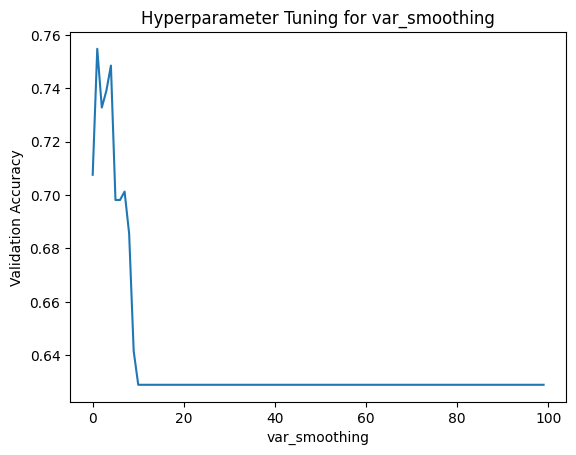

In [207]:
# Define an array from 0 to 100 with step size 1
candidate_values = np.arange(0, 100, 1)
# Storing accuracy
accs = []
for vs in candidate_values:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_normal_train, Y_train)
    acc = model.score(X_normal_val, Y_val)
    accs.append(acc)

plt.plot(candidate_values, accs)
plt.xlabel("var_smoothing")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning for var_smoothing")
plt.show()

- By observation, the higher accuracy values fall within the range (0, 4). We first identify this sub-optimal interval, then redefine a new array with smaller step sizes within (0, 4). This refined array is used to test accuracy across the narrowed hyperparameter range.

### 2.5 Do you think this dataset is sufficient for accurately predicting travel insurance purchases? What additional data points would you collect to improve prediction accuracy?

- As discussed in Question 2.3, the dataset **suffers from class imbalance and limited feature diversity**.
- *Demographic variables* such as Age, FamilyMembers, or GraduationStatus **contribute very little to predictive power**, while **most of the signal comes from financial and travel-related behavior**. This makes **the dataset unbalanced** and *restricts the models’ ability to generalize*.

- The models achieve reasonable accuracy overall, but they perform much better at identifying customers who do not purchase travel insurance (label [0]) than those who do (label [1]). This imbalance indicates that important behavioral or contextual factors are missing.
- Some suggesting data points - or features that are essential to improve prediction's accuracy:
  1. Past travel insurance history (whether the customer has purchased before): If someone has bought travel insurance before, they’re much more likely to buy again. It shows they’ve already accepted the idea, know how it works, and probably see value in it. This past behavior is one of the strongest signals of future behavior.
  2. Travel frequency and duration (e.g., number of trips abroad per year, typical trip length): People who travel often, or take longer trips, face more risk and are more likely (or sometimes required) to get insurance. A once-a-year weekend trip is very different from a month-long overseas stay. These features directly capture the customer’s real exposure, which makes predictions far more accurate.